In [54]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df_suv = pd.read_csv("listings_suv.csv")
df_cars = pd.read_csv("listings.csv")
df_cars = df_cars[df_cars['Yakıt Tipi'] != 'Elektrik']
df_suv = df_suv[df_suv['Yakıt Tipi'] != 'Elektrik']
df = pd.concat([df_suv, df_cars], ignore_index=True)
df = df.iloc[:, :22]

In [55]:
def apply_(s):
    if pd.isna(s):
        return
    else:
        try:
            if "-" in s:
                s = s.replace("cm3", "").replace(" ", "")
                return statistics.mean([int(a) for a in s.split("-")])
            else:
                return int(s.replace("cc", "").replace(" ", ""))
        except:
            return


def apply_2(s):
    if pd.isna(s):
        return
    else:
        try:
            if "-" in s:
                s = s.replace("HP", "").replace(" ", "")
                return statistics.mean([int(a) for a in s.split("-")])
            else:
                return int(s.replace("hp", "").replace(" ", ""))
        except:
            return


def apply_1(s):
    if not s:
        return
    else:
        return int(s.split("TL")[0].replace(" TL", "").replace(".", ""))


def apply_3(s):
    if pd.isna(s):
        return
    else:
        return float(s.replace(" lt", "").replace(",", "."))


def apply_4(s):
    if pd.isna(s):
        return
    else:
        return float(s.replace(" km", "").replace(".", ""))



def apply_5(s):
    if pd.isna(s):
        return None,None
    else:
        if "Belirtilmemiş" in s:
            return None,None
        elif "Tamamı orjinal" in s:
            return 0,0
        elif "Tamamı boyalı" in s:
            return 12,0
        else:
            t = s.split(", ")
            o = 0
            p = 0
            for a in t:
                if "değişen" in a:
                    o = int(a.replace(" değişen",""))
                elif "boyalı" in a:
                    p = int(a.replace(" boyalı",""))
            return p,o


def apply_6(s):
    if pd.isna(s):
        return False
    else:
        if "Agir hasarli" in s:
            return True
        else:
            return False

In [56]:
df["Fiyat"] = df["Fiyat"].apply(apply_1)
df["Kilometre"] = df["Kilometre"].apply(apply_4)
df["Motor Hacmi"] = df["Motor Hacmi"].apply(apply_)
df["Motor Gücü"] = df["Motor Gücü"].apply(apply_2)
df["Ort. Yakıt Tüketimi"] = df["Ort. Yakıt Tüketimi"].apply(apply_3)
df["Agir Hasarli"] = df["tramer"].apply(apply_6)
df[['Boya', 'Değişen']] = df['Boya-değişen'].apply(apply_5).apply(pd.Series)
df.drop(["Yakıt Deposu","İlan Tarihi","Takasa Uygun","Boya-değişen","İlan No","tramer"], axis=1, inplace=True)

# Fill missing values
for column in df.select_dtypes(include=['float64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Drop rows with missing categorical data (if any remain)
df.dropna(inplace=True)

df.head()

,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Kimden,Fiyat,Agir Hasarli,Boya,Değişen
0,Chevrolet,Captiva,2.0 D LT High,2010,74000.0,Otomatik,Dizel,Crossover,Siyah,1991.0,150.0,4WD (Sürekli),İkinci El,8.7,Galeriden,810000,False,2.0,0.0
1,Audi,Q5,2.0 TDI Quattro,2010,258000.0,Yarı Otomatik,Dizel,Crossover,Beyaz,1968.0,170.0,4WD (Sürekli),İkinci El,6.7,Galeriden,1180000,False,0.0,0.0
2,Opel,Antara,2.0 CDTI Enjoy,2010,253000.0,Otomatik,Dizel,Crossover,Beyaz,1991.0,150.0,4WD (Sürekli),İkinci El,8.6,Galeriden,620000,False,0.0,1.0
3,Volkswagen,Tiguan,1.4 TSI Sport&Style,2010,176000.0,Düz,Benzin,Crossover,Beyaz,1390.0,150.0,Önden Çekiş,İkinci El,6.7,Sahibinden,700000,False,1.0,2.0
4,Nissan,Qashqai,1.6 Visia,2010,118750.0,Düz,Benzin,Crossover,Siyah,1598.0,115.0,Önden Çekiş,İkinci El,6.7,Sahibinden,615000,False,4.0,0.0


In [57]:
df.describe()

,Yıl,Kilometre,Motor Hacmi,Motor Gücü,Ort. Yakıt Tüketimi,Fiyat,Boya,Değişen
count,40619.000000,4.061900e+04,40619.000000,40619.000000,40619.000000,4.061900e+04,40619.000000,40619.000000
mean,2016.230902,1.315446e+05,1518.933413,121.094767,5.259782,1.101658e+06,1.629573,0.457079
std,3.952670,3.143966e+05,359.164033,45.399836,1.205081,3.125115e+06,1.788143,0.688459
min,2010.000000,0.000000e+00,875.000000,55.000000,1.200000,2.400000e+04,0.000000,0.000000
25%,2013.000000,6.216500e+04,1368.000000,95.000000,4.300000,6.220000e+05,0.000000,0.000000
50%,2016.000000,1.220000e+05,1498.000000,114.000000,5.200000,7.997500e+05,1.629573,0.457079
75%,2020.000000,1.840000e+05,1598.000000,132.000000,5.900000,1.117250e+06,1.629573,0.457079
max,2024.000000,5.650000e+07,6750.000000,1250.000000,20.000000,4.600000e+08,12.000000,9.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40619 entries, 0 to 40618
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marka                40619 non-null  object 
 1   Seri                 40619 non-null  object 
 2   Model                40619 non-null  object 
 3   Yıl                  40619 non-null  int64  
 4   Kilometre            40619 non-null  float64
 5   Vites Tipi           40619 non-null  object 
 6   Yakıt Tipi           40619 non-null  object 
 7   Kasa Tipi            40619 non-null  object 
 8   Renk                 40619 non-null  object 
 9   Motor Hacmi          40619 non-null  float64
 10  Motor Gücü           40619 non-null  float64
 11  Çekiş                40619 non-null  object 
 12  Araç Durumu          40619 non-null  object 
 13  Ort. Yakıt Tüketimi  40619 non-null  float64
 14  Kimden               40619 non-null  object 
 15  Fiyat                40619 non-null 

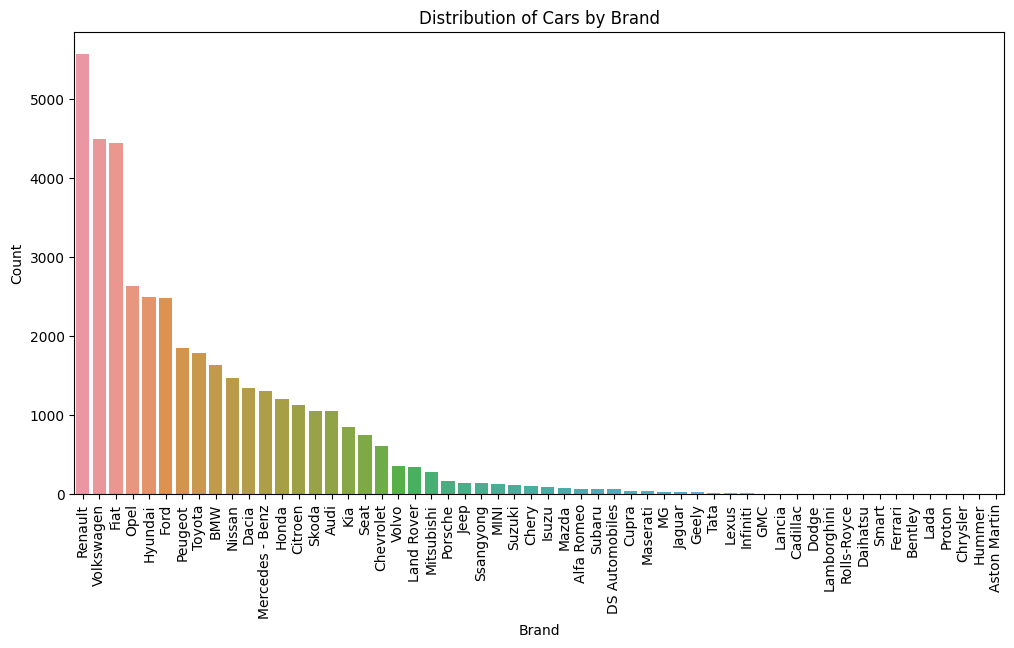

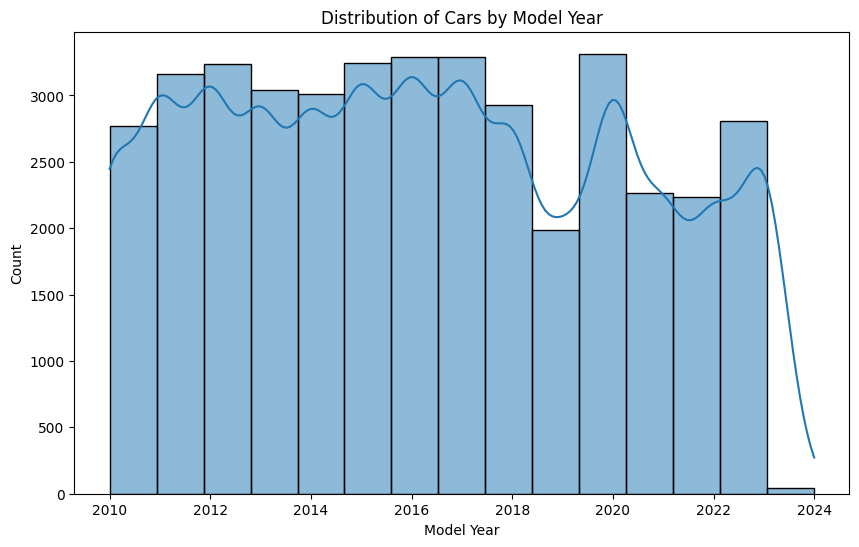

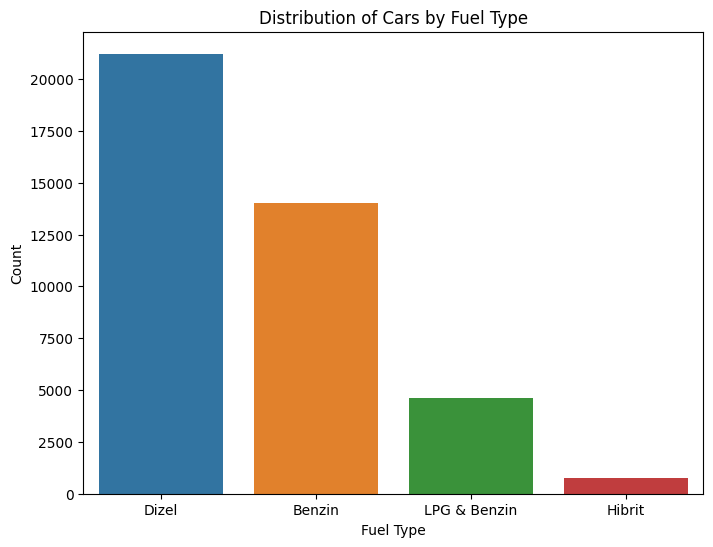

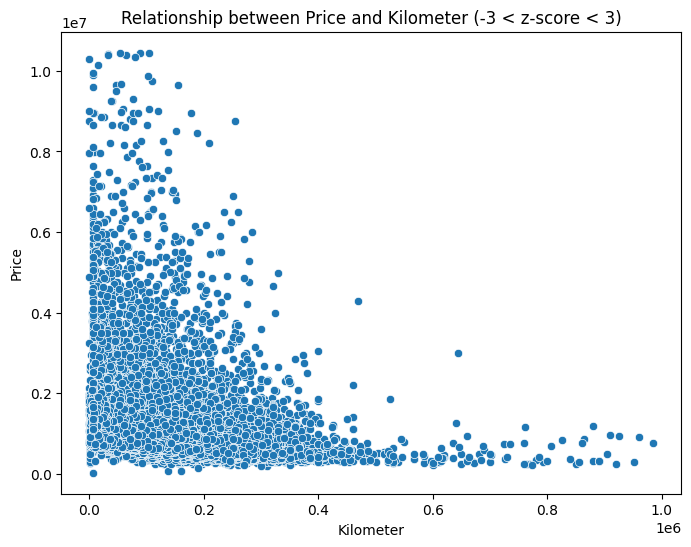

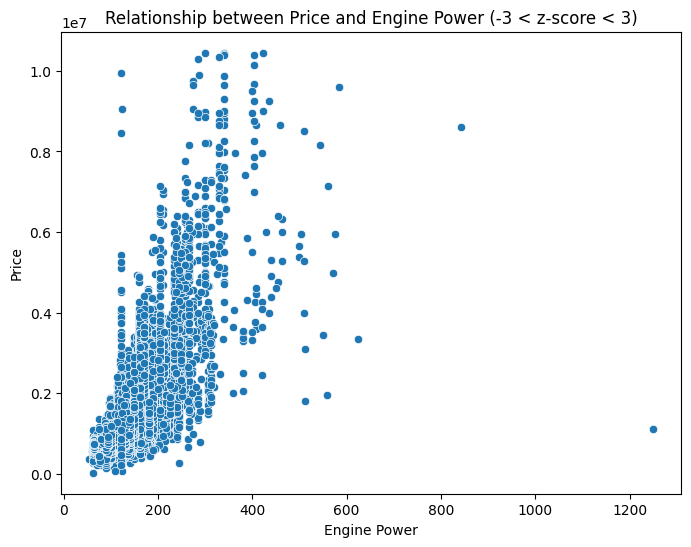

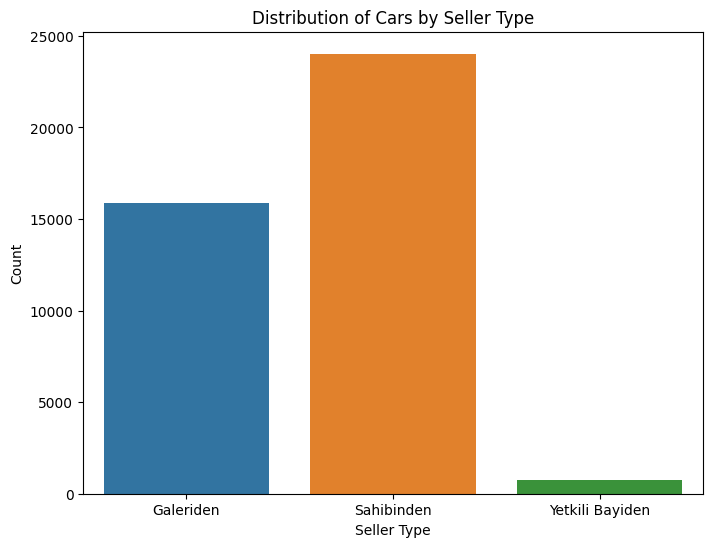

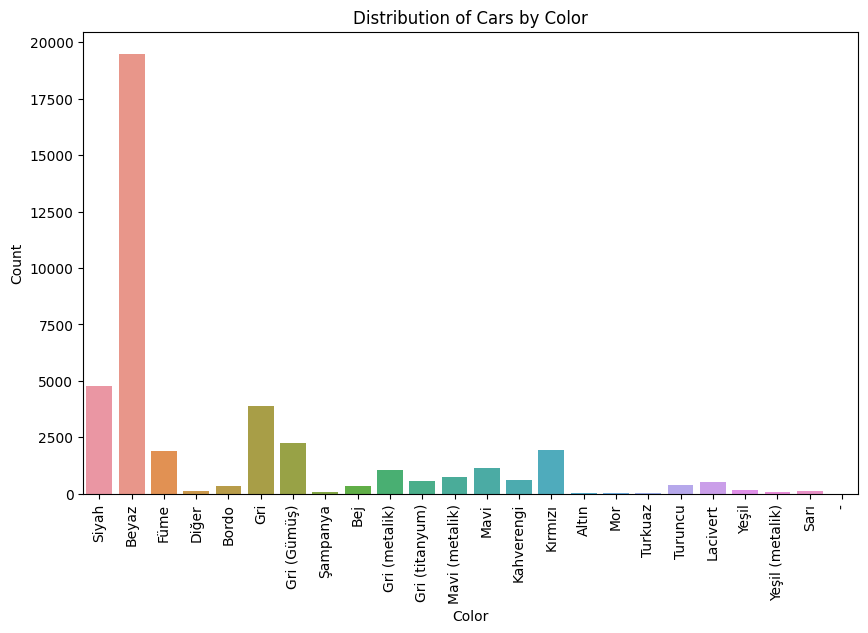

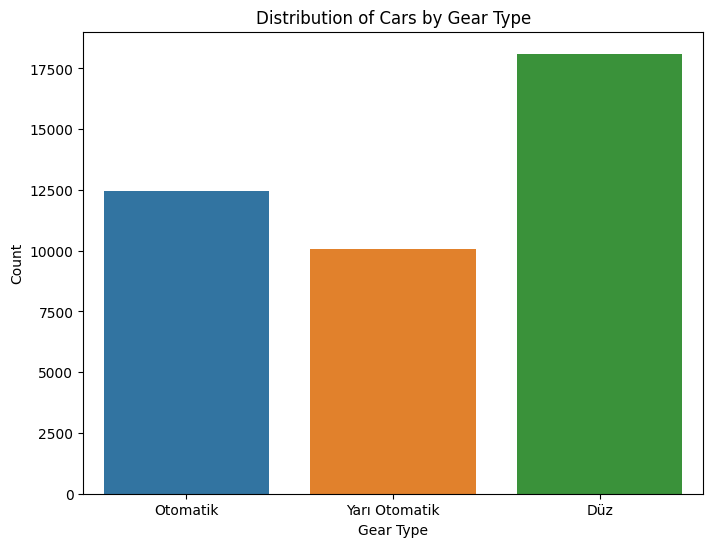

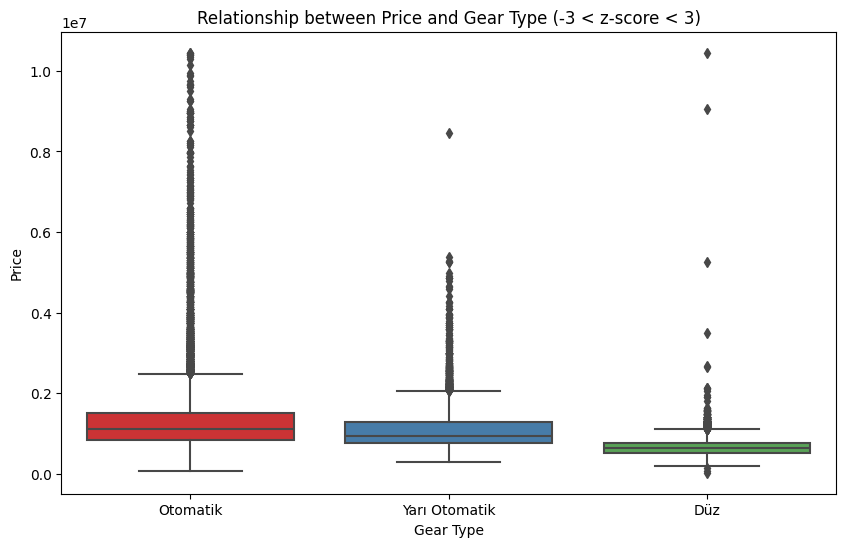

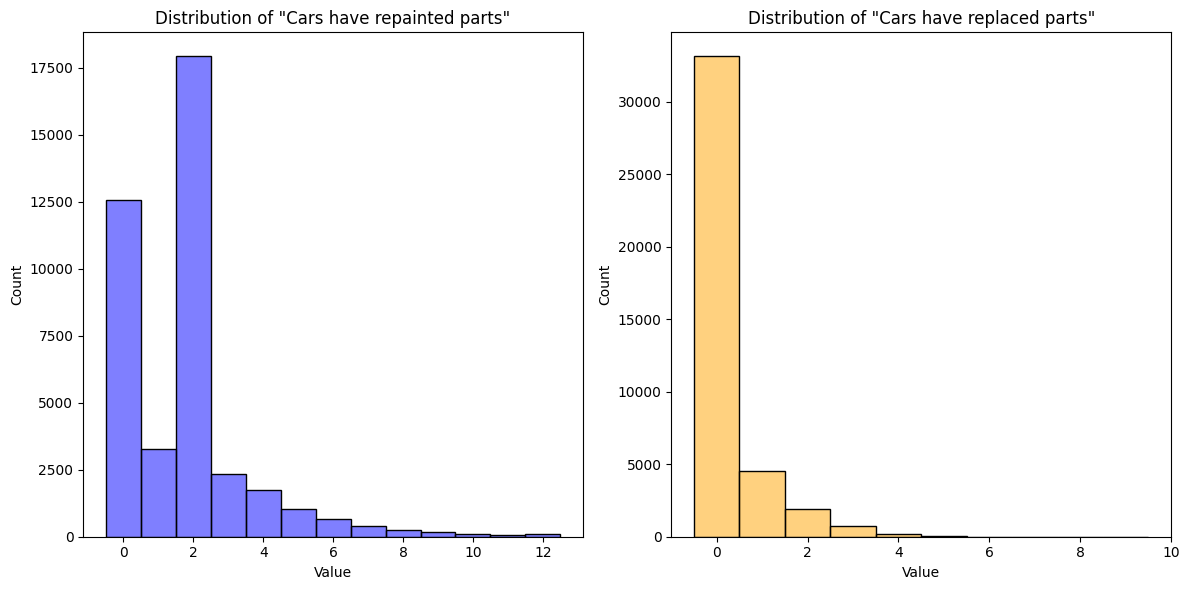

In [59]:
# Plot 1: Distribution of cars by brand
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Marka', order=df['Marka'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

# Plot 2: Distribution of cars by model year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Yıl', bins=15, kde=True)
plt.title('Distribution of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

# Plot 3: Distribution of cars by fuel type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Yakıt Tipi')
plt.title('Distribution of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

# Plot 4: Relationship between price and kilometer
mean_price = df['Fiyat'].mean()
std_price = df['Fiyat'].std()
mean_kilometer = df['Kilometre'].mean()
std_kilometer = df['Kilometre'].std()

z_threshold = 3
filtered_df = df[(abs((df['Fiyat'] - mean_price) / std_price) <= z_threshold) & 
                 (abs((df['Kilometre'] - mean_kilometer) / std_kilometer) <= z_threshold)]

# Plot the relationship between price and kilometer without outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Kilometre', y='Fiyat')
plt.title('Relationship between Price and Kilometer (-3 < z-score < 3)')
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.show()

# Plot 5: Relationship between price and engine power
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Motor Gücü', y='Fiyat')
plt.title('Relationship between Price and Engine Power (-3 < z-score < 3)')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.show()


# Plot 6: Distribution of the Seller Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Kimden')
plt.title('Distribution of Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()


# Plot 7: Distribution of the Colors
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Renk')
plt.title('Distribution of Cars by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot 8: Distribution of the Gear Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Vites Tipi')
plt.title('Distribution of Cars by Gear Type')
plt.xlabel('Gear Type')
plt.ylabel('Count')
plt.show()

# Plot the relationship between Price and Gear Type
mean_price = df['Fiyat'].mean()
std_price = df['Fiyat'].std()

z_threshold = 3
filtered_df = df[(abs((df['Fiyat'] - mean_price) / std_price) <= z_threshold)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Vites Tipi', y='Fiyat', palette='Set1')
plt.title('Relationship between Price and Gear Type (-3 < z-score < 3)')
plt.xlabel('Gear Type')
plt.ylabel('Price')
plt.show()

# Histogram for "Boya"
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Boya', bins=2, discrete=True, color='blue', alpha=0.5)
plt.title('Distribution of "Cars have repainted parts"')
plt.xlabel('Value')
plt.ylabel('Count')

# Histogram for "Değişen"
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Değişen', bins=2, discrete=True, color='orange', alpha=0.5)
plt.title('Distribution of "Cars have replaced parts"')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

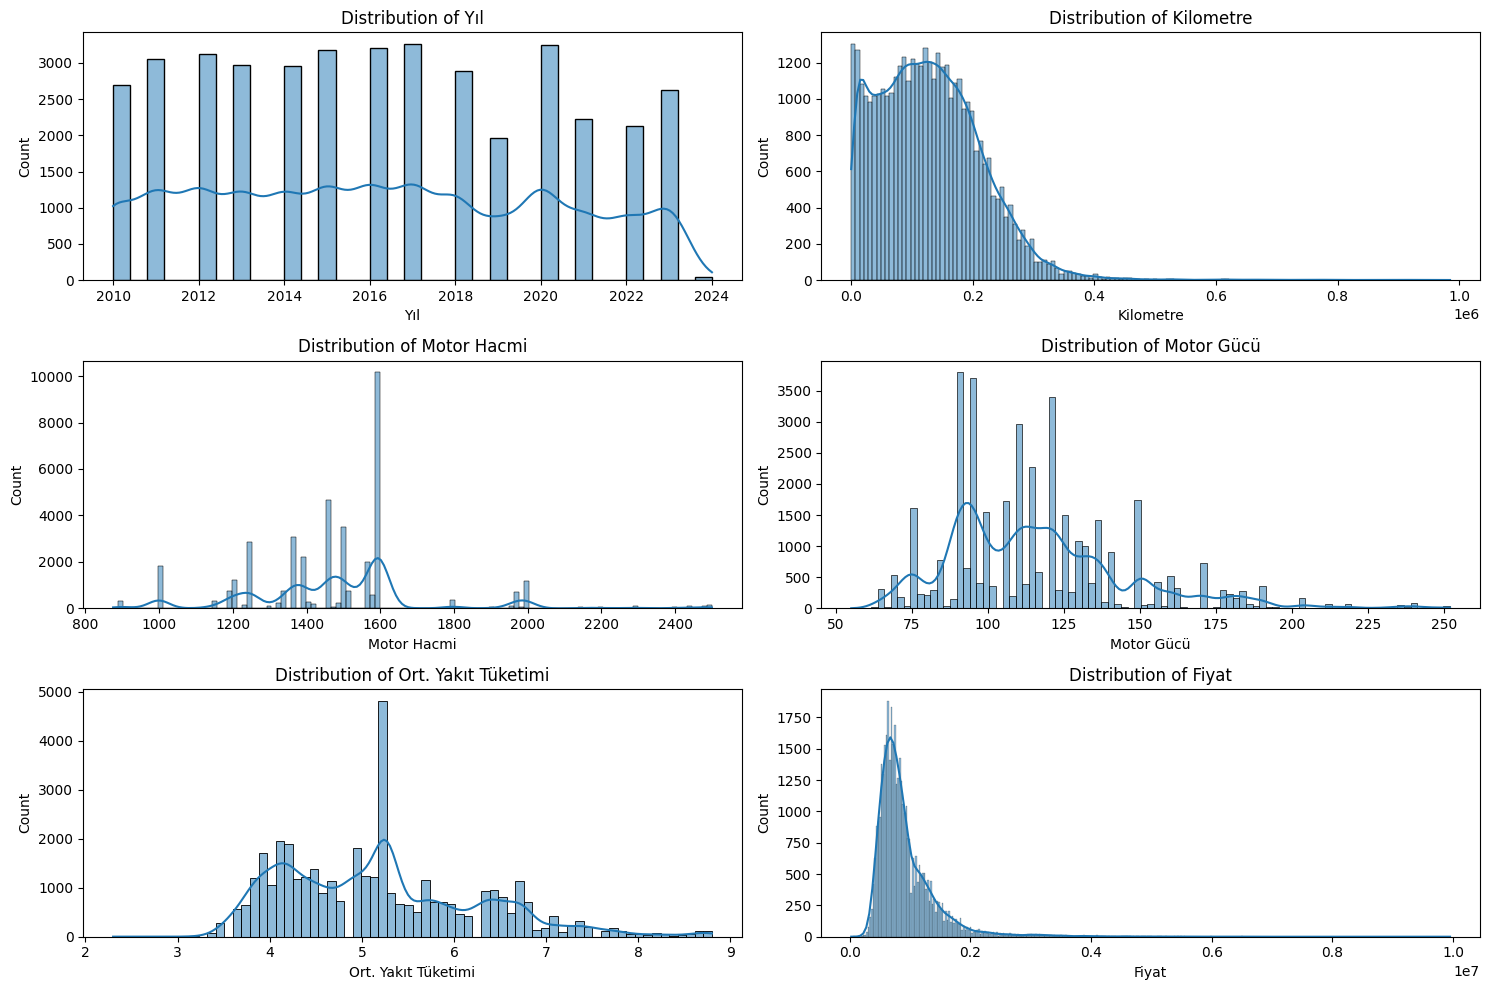

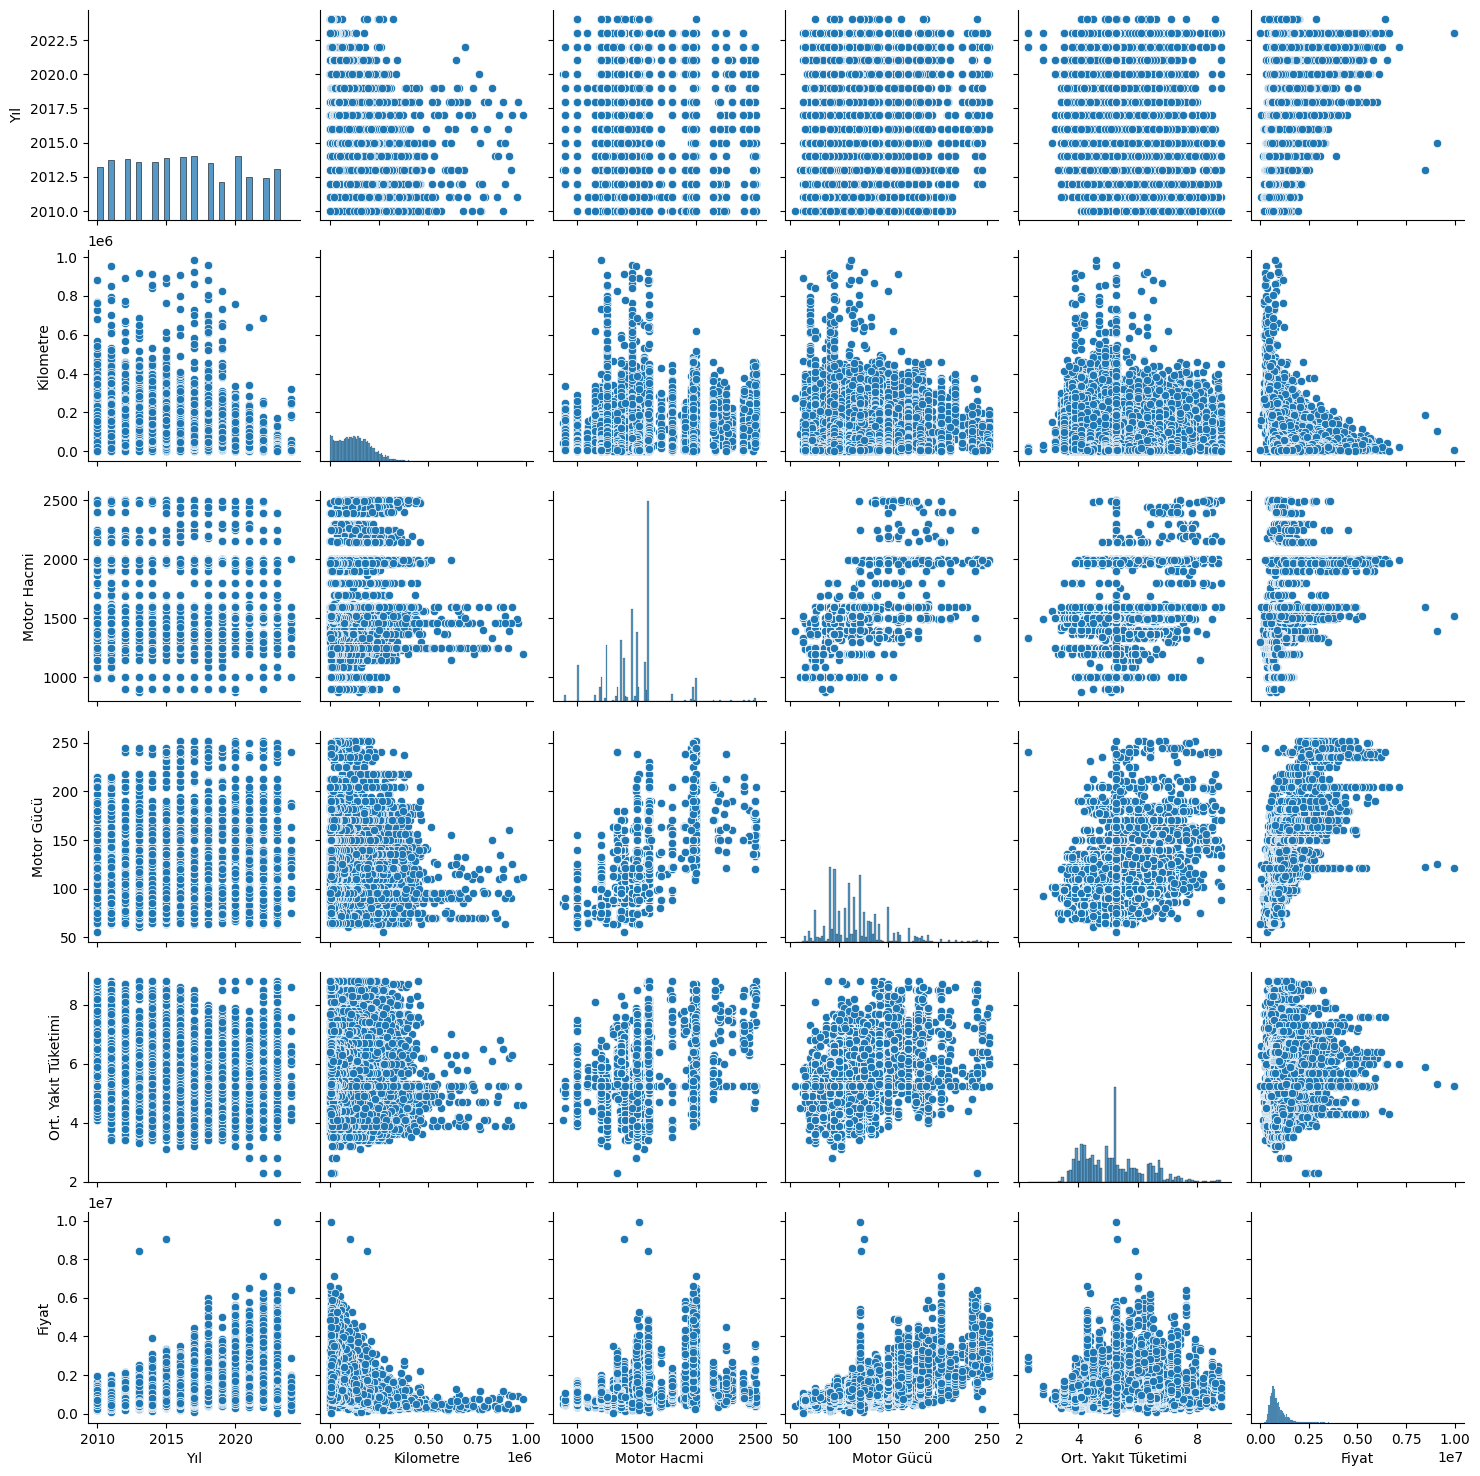

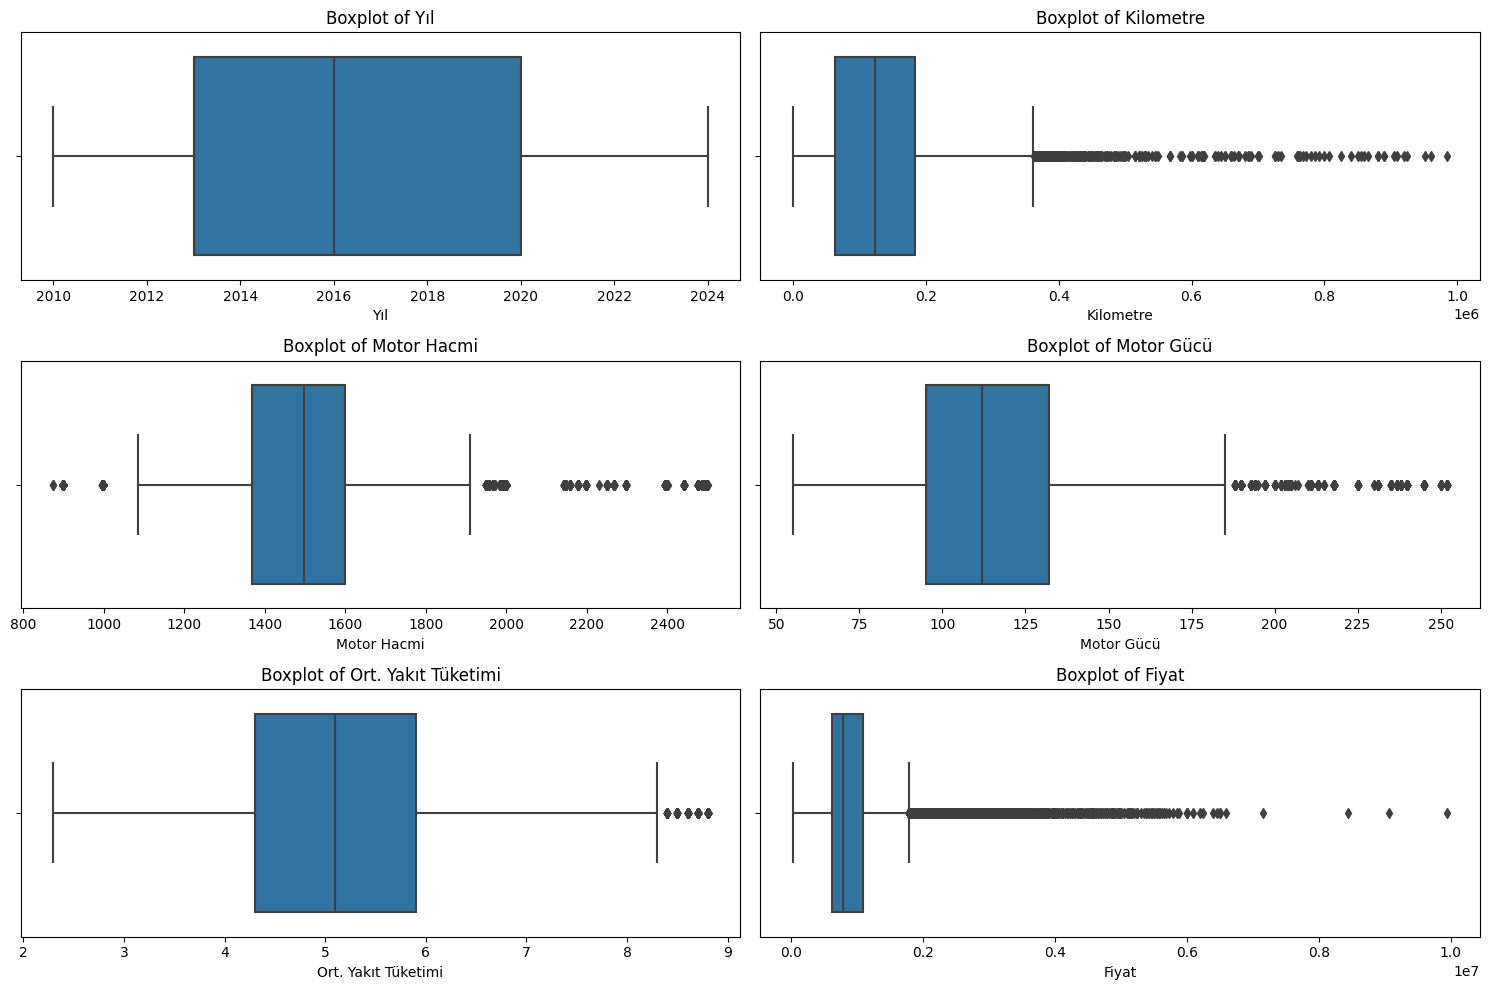

In [60]:
from scipy import stats

# Calculate Z-scores for numerical variables
z_scores = stats.zscore(df[numerical_vars])

# Threshold for considering a data point as an outlier
threshold = 3


# Identify outliers using Z-score
outlier_indices = ((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)

# Extract outliers from the original DataFrame
df = df[~outlier_indices]

df.to_csv("final.csv", index=False)

# Visualize numerical variables
plt.figure(figsize=(15, 10))

numerical_vars = ['Yıl', 'Kilometre', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi', 'Fiyat']

for i, var in enumerate(numerical_vars):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plt.show()



# Select a subset of columns for pairplot
subset_vars = ['Yıl', 'Kilometre', 'Motor Hacmi', 'Motor Gücü', 'Ort. Yakıt Tüketimi', 'Fiyat']

# Plot pairplot
sns.pairplot(df[subset_vars])
plt.show()

# Visualize boxplots for outliers
plt.figure(figsize=(15, 10))

for i, var in enumerate(numerical_vars):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.tight_layout()

plt.show()

        Marka     Seri                Model   Yıl  Kilometre     Vites Tipi  \
0   Chevrolet  Captiva        2.0 D LT High  2010    74000.0       Otomatik   
1        Audi       Q5      2.0 TDI Quattro  2010   258000.0  Yarı Otomatik   
2        Opel   Antara       2.0 CDTI Enjoy  2010   253000.0       Otomatik   
3  Volkswagen   Tiguan  1.4 TSI Sport&Style  2010   176000.0            Düz   
4      Nissan  Qashqai            1.6 Visia  2010   118750.0            Düz   

  Yakıt Tipi  Kasa Tipi   Renk  Motor Hacmi  Motor Gücü          Çekiş  \
0      Dizel  Crossover  Siyah       1991.0       150.0  4WD (Sürekli)   
1      Dizel  Crossover  Beyaz       1968.0       170.0  4WD (Sürekli)   
2      Dizel  Crossover  Beyaz       1991.0       150.0  4WD (Sürekli)   
3     Benzin  Crossover  Beyaz       1390.0       150.0    Önden Çekiş   
4     Benzin  Crossover  Siyah       1598.0       115.0    Önden Çekiş   

  Araç Durumu  Ort. Yakıt Tüketimi      Kimden    Fiyat  Agir Hasarli  Boya  \
0

[I 2024-06-03 23:02:53,876] A new study created in memory with name: no-name-0ee79adc-3e99-4ae0-b2e2-018acf1f1534
[I 2024-06-03 23:03:33,554] Trial 0 finished with value: 134074.24107634247 and parameters: {'learning_rate': 0.11152966331493866, 'num_leaves': 146, 'max_depth': 44, 'feature_fraction': 0.6073570327779693, 'bagging_fraction': 0.8320534881685948, 'bagging_freq': 7}. Best is trial 0 with value: 134074.24107634247.
[I 2024-06-03 23:04:06,481] Trial 1 finished with value: 132349.9358475234 and parameters: {'learning_rate': 0.02723134304823708, 'num_leaves': 93, 'max_depth': -1, 'feature_fraction': 0.7746710830489354, 'bagging_fraction': 0.7927851132414554, 'bagging_freq': 9}. Best is trial 1 with value: 132349.9358475234.
[I 2024-06-03 23:04:29,282] Trial 2 finished with value: 134548.77459527392 and parameters: {'learning_rate': 0.0449833102828706, 'num_leaves': 25, 'max_depth': 47, 'feature_fraction': 0.9498782073939952, 'bagging_fraction': 0.9374725009746062, 'bagging_freq'

Best parameters found by Optuna:
{'learning_rate': 0.050564104358695065, 'num_leaves': 103, 'max_depth': 31, 'feature_fraction': 0.7077280776340268, 'bagging_fraction': 0.8423254861003915, 'bagging_freq': 3}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 31668, number of used features: 636
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 932440.526873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

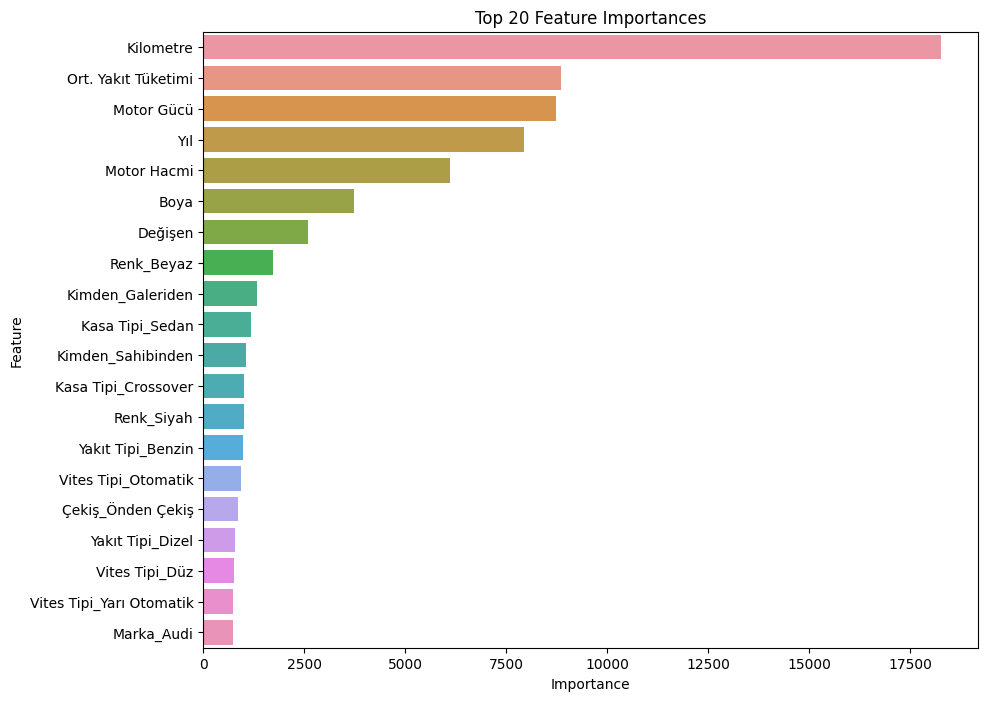

In [61]:
import optuna
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("final.csv")
print(df.head())

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=[
    'Marka', 'Seri', 'Model', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
    'Renk', 'Çekiş', 'Araç Durumu', 'Kimden'
])

# Define the target and features
target = 'Fiyat'
features = df.columns.tolist()
features.remove(target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=6)

# Create the LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


def objective(trial):
    # Define the parameter grid
    param = {
        'objective': 'gamma',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', -1, 50),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'verbose': -1,
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=6)
    rmse_scores = []
    for train_index, val_index in kf.split(df[features]):
        X_train, X_val = df.loc[train_index, features], df.loc[val_index, features]
        y_train, y_val = df.loc[train_index, target], df.loc[val_index, target]

        # Train the LightGBM model
        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
        bst = lgb.train(param, train_data, valid_sets=[train_data, val_data], num_boost_round=1000)

        # Predict on the validation set and calculate RMSE
        y_pred = bst.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE as the objective value for Optuna
    return np.mean(rmse_scores)


# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Get the best parameters
best_params = study.best_params
print("Best parameters found by Optuna:")
print(best_params)

# Train the model
bst_optimized = lgb.train(best_params, train_data, valid_sets=[train_data, test_data], num_boost_round=1000)

# Save the optimized model
bst_optimized.save_model('lightgbm_model_optimized.txt')

# Predict on the test set
y_pred_optimized = bst_optimized.predict(X_test, num_iteration=bst_optimized.best_iteration)

# Calculate the RMSE on the original scale
denormalized_rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)
print(f"Optimized Denormalized RMSE: {denormalized_rmse_optimized}")


# Plot feature importance
def plot_feature_importance(model, features, max_num_features=20):
    importance = model.feature_importance(importance_type='split')
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': importance
    }).sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(max_num_features))
    plt.title('Top 20 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


plot_feature_importance(bst_optimized, features)